In [107]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy as sp
import scipy.stats as astats

## 유기동물들이 버려지는 이유는 뭘까?

### 사용한 데이터

In [26]:
data_in = pd.read_csv('Austin_Animal_Center_Intakes.csv')
data_out = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

### 1) 버려지는 동물들의 공통적인 특성이 있을까?

### 가설 : 늙고 병든 아이들이 버려질 것이다

#### 1. 길거리에 버려진 동물들의 자료만 취합

In [33]:
changing_value = {'owner surrender:stray', 'abandoned:stray'}
data_in = data_in.replace({'Intake Type': changing_value})
cutpre = data_in['Intake Type'] == 'Stray'
cutpre = data_in[cutpre]
cutpre

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
124113,A830173,NaN,03/03/2021 03:59:00 PM,03/03/2021 03:59:00 PM,14912 Fagerquist Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 year,Cairn Terrier,Brown
124114,A830169,NaN,03/03/2021 03:19:00 PM,03/03/2021 03:19:00 PM,9025 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull,Black/White
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White


#### 2. 나이

In [58]:
age_map={'-1 years':'young',  '-2 years':'young', '-3 years':'young', '0 years':'young', '1 day':'young','1 month':'young','1 week':'young','1 weeks':'young',
        '1 year':'young','10 months':'young','10 years':'old','11 months':'young',
        '11 years':'old','12 years':'old','13 years':'old','2 days':'young',
         '14 years':'old', '15 years':'old', '16 years':'old', '17 years':'old', 
         '18 years':'old', '19 years':'old', '2 months':'young','2 weeks':'young',
         '2 years':'middle','20 years':'old','22 years':'old','23 years':'old',
         '24 years':'old','3 days':'young','3 months':'young', '3 weeks':'young',
         '3 years':'middle', '4 days':'young', '4 months':'young', '4 weeks':'young',
         '4 years' : 'middle', '5 days':'young', '5 months':'young', '5 weeks':'young',
         '5 years' : 'middle', '6 days':'young', '6 months':'young', '6 weeks':'young',
         '6 years' : 'middle', '7 days':'young', '7 months':'young', '7 weeks':'young',
         '7 years' : 'old', '8 months' : 'young', '8 years':'old',  '9 months' : 'young', '9 years':'old'}
cutpre['Age'] = cutpre['Age upon Intake'].map(age_map)
cutpre

<ipython-input-58-cd2c20f5ddda>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutpre['Age'] = cutpre['Age upon Intake'].map(age_map)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Age
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,middle
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,old
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,young
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,young
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124113,A830173,NaN,03/03/2021 03:59:00 PM,03/03/2021 03:59:00 PM,14912 Fagerquist Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 year,Cairn Terrier,Brown,young
124114,A830169,NaN,03/03/2021 03:19:00 PM,03/03/2021 03:19:00 PM,9025 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull,Black/White,middle
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan,young
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White,young


In [75]:
df=cutpre.groupby('Age')['Animal ID'].count()
df

Age
middle    23725
old        6451
young     56279
Name: Animal ID, dtype: int64

#### 3. 성별+ 중성화

In [78]:
df2=cutpre.groupby('Sex upon Intake')['Animal ID'].count()
df2

Sex upon Intake
Intact Female    30830
Intact Male      32815
Neutered Male     9872
Spayed Female     8188
Unknown           4750
Name: Animal ID, dtype: int64

#### 4. 다친여부, 임신여부

In [63]:
cutpre.groupby('Intake Condition').describe()

Animal ID                        Name                        \
                     count unique      top freq  count unique       top freq   
Intake Condition                                                               
Aged                   259    257  A719648    2    219    206      Lady    3   
Behavior                 6      6  A821034    1      6      6      Luna    1   
Feral                   95     95  A759985    1     28     28      *Dax    1   
Injured               5120   5096  A676423    3   3001   2219       Max   17   
Medical                 43     43  A818502    1     30     29      Coco    2   
Normal               75085  70916  A718877   12  50292  14652       Max  289   
Nursing               3032   3032  A725244    1    962    840   *Violet    5   
Other                  137    137  A664945    1     87     84    Phoebe    2   
Pregnant                57     57  A731136    1     28     27  Princess    2   
Sick                  2621   2615  A796845    2   1102    975    Smokey    4   

                 DateTime         ...                    Breed         Color  \
                    count unique  ...                      top   freq  count   
Intake Condition                  ...                                          
Aged                  259    253  ...  Chihuahua Shorthair Mix     28    259   
Behavior                6      6  ...               Vizsla Mix      1      6   
Feral                  95     69  ...   Domestic Shorthair Mix     54     95   
Injured              5120   4790  ...   Domestic Shorthair Mix   1387   5120   
Medical                43     40  ...       Domestic Shorthair     10     43   
Normal              75085  52773  ...   Domestic Shorthair Mix  20634  75085   
Nursing              3032    921  ...   Domestic Shorthair Mix   1350   3032   
Other                 137    107  ...   Domestic Shorthair Mix     32    137   
Pregnant               57     52  ...   Domestic Shorthair Mix      7     57   
Sick                 2621   2165  ...   Domestic Shorthair Mix    879   2621   

                                                      Age                 \
                 unique                  top  freq  count unique     top   
Intake Condition                                                           
Aged                 67          Black/White    21    259      3     old   
Behavior              6  Brown Brindle/White     1      6      1  middle   
Feral                34                Black    12     95      3   young   
Injured             240                Black   522   5120      3   young   
Medical              21                White     6     43      3   young   
Normal              497          Black/White  8034  75085      3   young   
Nursing             140          Brown Tabby   350   3032      3   young   
Other                49                Black    22    137      3   young   
Pregnant             31          Brown/White     6     57      3  middle   
Sick                168                Black   322   2621      3   young   

                         
                   freq  
Intake Condition         
Aged                248  
Behavior              6  
Feral                61  
Injured            2379  
Medical              21  
Normal            49137  
Nursing            2911  
Other                69  
Pregnant             27  
Sick               1674  

[10 rows x 48 columns]

In [86]:
condition_map = {'Injured': 'sick', 'Medical': 'sick','Behavior': 'sick',
                'Feral': 'sick', 'Nursing': 'sick','Sick':'sick', 'Pregnant':'pregnant', 'Normal': 'normal'}
cutpre['Condition'] = cutpre['Intake Condition'].map(condition_map)
cutpre

<ipython-input-86-91b4b0330ea1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutpre['Condition'] = cutpre['Intake Condition'].map(condition_map)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Age,Condition
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,middle,normal
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,old,normal
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,young,normal
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,young,sick
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,middle,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124113,A830173,NaN,03/03/2021 03:59:00 PM,03/03/2021 03:59:00 PM,14912 Fagerquist Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 year,Cairn Terrier,Brown,young,normal
124114,A830169,NaN,03/03/2021 03:19:00 PM,03/03/2021 03:19:00 PM,9025 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull,Black/White,middle,normal
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan,young,normal
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White,young,sick


In [81]:
df3=cutpre.groupby('Condition')['Animal ID'].count()
df3

Condition
normal      75085
pregnant       57
sick        10917
Name: Animal ID, dtype: int64

### 시각화

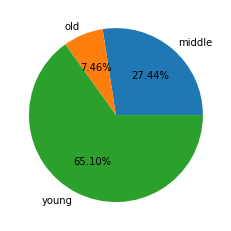

In [85]:
plt.pie(df, labels = df.index, autopct = "%.2f%%")
plt.show()

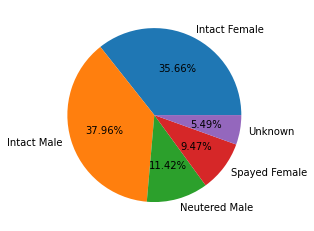

In [84]:
plt.pie(df2, labels = df2.index, autopct = "%.2f%%")
plt.show()

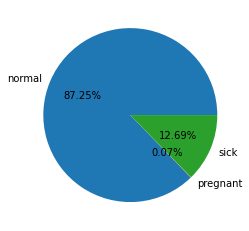

In [97]:
plt.pie(df3, labels = df3.index, autopct = "%.2f%%")
plt.show()

### 버려지는 아이들에는 이유가 없다
#### 나이 : 1살까지 어린아이로 잡았음에도 불구하고 이 나이대가 제일 많이 버려졌다
#### 성별: 제일 눈에 띄는 확률, 중성화가 안된 아이들이 70프로를 넘었다
#### 컨디션 : 정상인 아이들이 압도적으로 더 많이 버려졌다

In [94]:
so=pd.merge(cutpre, data_out, on = 'Animal ID', how = 'left')
so

,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,01/08/2019 03:11:00 PM,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,07/05/2015 03:13:00 PM,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,04/21/2016 05:17:00 PM,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,10/21/2013 11:39:00 AM,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,07/02/2014 02:16:00 PM,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106570,A830173,NaN,03/03/2021 03:59:00 PM,03/03/2021 03:59:00 PM,14912 Fagerquist Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106571,A830169,NaN,03/03/2021 03:19:00 PM,03/03/2021 03:19:00 PM,9025 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Female,2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106572,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,...,03/03/2021 05:19:00 PM,03/03/2021 05:19:00 PM,03/09/2020,Adoption,NaN,Dog,Neutered Male,11 months,Rottweiler Mix,Black/Tan
106573,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
so.groupby("Outcome Type").describe()

Animal ID                      Name_x                         \
                    count unique      top freq  count unique        top freq   
Outcome Type                                                                   
Adoption            45704  38090  A701265   25  36517  10732       Luna  217   
Died                  832    817  A773428    4    252    232    *Atreyu    4   
Disposal              116    112  A809587    2      8      6      Katie    2   
Euthanasia           2912   2844  A697658    5    765    629       Blue    6   
Missing                73     58  A700840    6     58     43  *Amarillo    6   
Relocate                8      8  A775462    1      0      0        NaN  NaN   
Return to Owner     25086  13776  A721033  155  24455   5084        Max  244   
Rto-Adopt             781    497  A784785   14    769    386       Oreo   14   
Transfer            30783  29255  A690543   10  12250   6079      Bella   38   

                DateTime_x         ...                 Breed_y        Color_y  \
                     count unique  ...                     top   freq   count   
Outcome Type                       ...                                          
Adoption             45704  29571  ...  Domestic Shorthair Mix  10394   45704   
Died                   832    748  ...  Domestic Shorthair Mix    376     832   
Disposal               116    107  ...      Domestic Shorthair     48     116   
Euthanasia            2912   2818  ...  Domestic Shorthair Mix   1177    2912   
Missing                 73     66  ...  Domestic Shorthair Mix     21      73   
Relocate                 8      8  ...         Mockingbird Mix      1       8   
Return to Owner      25086  15494  ...            Pit Bull Mix   4101   25086   
Rto-Adopt              781    703  ...            Pit Bull Mix    131     781   
Transfer             30783  20857  ...  Domestic Shorthair Mix  12777   30783   

                                             Out                           
                unique          top  freq  count unique        top   freq  
Outcome Type                                                               
Adoption           415  Black/White  5240  45704      1  new owner  45704  
Died                90        Black   118      0      0        NaN    NaN  
Disposal            41        Black    37      0      0        NaN    NaN  
Euthanasia         174        Black   315      0      0        NaN    NaN  
Missing             31  Black/White     9      0      0        NaN    NaN  
Relocate             7        Black     2      0      0        NaN    NaN  
Return to Owner    310  Black/White  3007  25086      1     return  25086  
Rto-Adopt           81  Black/White    95      0      0        NaN    NaN  
Transfer           370        Black  3204      0      0        NaN    NaN  

[9 rows x 100 columns]

In [104]:
out_map = {'Adoption': 'new owner', 'Return to Owner': 'return','Died':"nan", 'Disposal':'nan', 'Euthanasia':'nan', 'Missing':'nan', 'Relocate':'nan', 'Rto-Adopt':'nan', 'Transfer':'nan' }
so['Out'] = so['Outcome Type'].map(out_map)
so

,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Out
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,01/08/2019 03:11:00 PM,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,nan
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,07/05/2015 03:13:00 PM,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,return
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,04/21/2016 05:17:00 PM,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White,return
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,...,10/21/2013 11:39:00 AM,09/21/2013,Transfer,Partner,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,nan
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,07/02/2014 02:16:00 PM,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106570,A830173,NaN,03/03/2021 03:59:00 PM,03/03/2021 03:59:00 PM,14912 Fagerquist Rd in Travis (TX),Stray,Normal,Dog,Intact Male,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106571,A830169,NaN,03/03/2021 03:19:00 PM,03/03/2021 03:19:00 PM,9025 Williamson Rd in Travis (TX),Stray,Normal,Dog,Intact Female,2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106572,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,...,03/03/2021 05:19:00 PM,03/09/2020,Adoption,NaN,Dog,Neutered Male,11 months,Rottweiler Mix,Black/Tan,new owner
106573,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df4=so.groupby('Out')['Animal ID'].count()
df4

Out
nan          35505
new owner    45704
return       25086
Name: Animal ID, dtype: int64

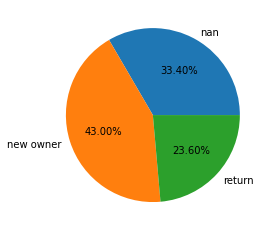

In [106]:
plt.pie(df4, labels = df4.index, autopct = "%.2f%%")
plt.show()

### 50% 이상이 입양이 되었고, 23%가 원래 주인에게 돌아갈 수 있었다